<a href="https://colab.research.google.com/github/Arijit-Biswas-Anirban/Data_Science_Learning/blob/main/Linear_Regression_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-03

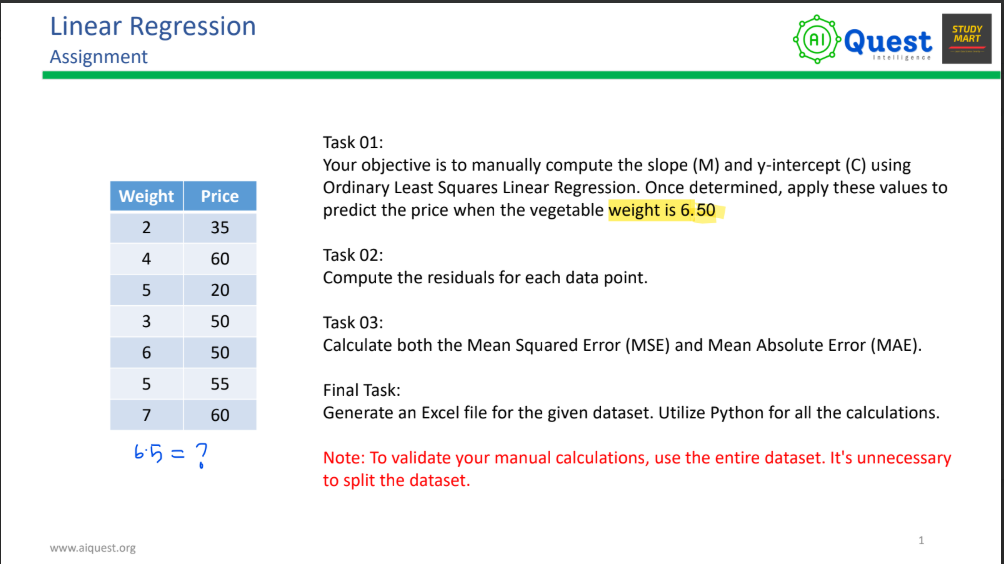

## Installing Libraries

In [115]:
!pip install pandas numpy matplotlib scikit-learn

## Importing necessary libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Creating the dataframe

In [117]:
weight = np.array([2, 4, 5, 3, 6, 5, 7])
price = np.array([35, 60, 20, 50, 50, 55, 60])

In [118]:
df = pd.DataFrame({'weight': weight, 'price': price})
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


## Performing EDA

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  7 non-null      int64
 1   price   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [120]:
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


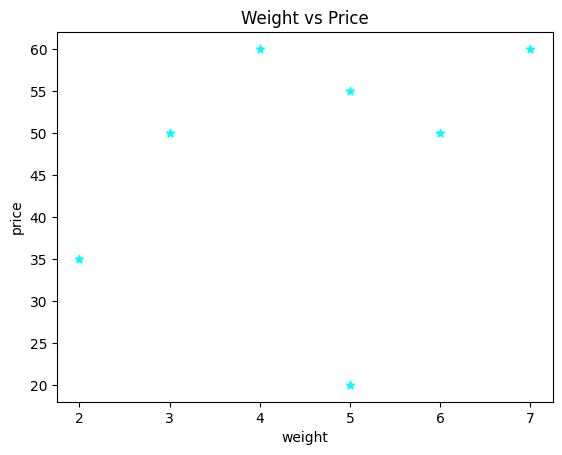

In [121]:
plt.scatter(df['weight'], df['price'], color='cyan', marker='*')
plt.xlabel('weight')
plt.ylabel('price')
plt.title('Weight vs Price')
plt.show()

## Calculating Slope and Intercept

### 1. Manually

In [122]:
x = df['weight']
y = df['price']

In [123]:
mean_x = np.mean(x)
print("mean of x: ",mean_x)
mean_y = np.mean(y)
print("mean of y: ",mean_y)
deviation_x = x - mean_x
print("deviation of x:\n",deviation_x)
deviation_y = y - mean_y
print("deviation of y:\n",deviation_y)

mean of x:  4.571428571428571
mean of y:  47.142857142857146
deviation of x:
 0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: weight, dtype: float64
deviation of y:
 0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: price, dtype: float64


### Formula : slope = SUM(Deviation_X - Deviation_Y) / SUM(Deviation_X ^ 2)

In [124]:
slope = np.sum(deviation_x * deviation_y) / np.sum(deviation_x ** 2)
print("slope: ", slope)

slope:  2.620967741935484


### Formula: intercept = mean_y - slope * mean_x

In [125]:
intercept = mean_y - slope * mean_x
print("intercept: ", intercept)

intercept:  35.16129032258065


### 2. Using built-in method from scikit-learn

In [126]:
X = df[['weight']]
Y = df['price']

In [127]:
lr = sklearn.linear_model.LinearRegression().fit(X,Y)

In [128]:
slope_2 = lr.coef_
slope_2

array([2.62096774])

In [129]:
intercept_2 = lr.intercept_
intercept_2

np.float64(35.16129032258065)

## Predict price for weight(x) = 6.5
### Formula price(y) = slope * weight(x) + intercept

In [130]:
predict_weight = 6.5
predict_price = slope * predict_weight + intercept
print("Predicted price: ", predict_price)

Predicted price:  52.197580645161295


In [131]:
predict_price_2 = (lr.coef_ * 6.5 + lr.intercept_)
predict_price_2

array([52.19758065])

## Visualizing of Linear Regression Model Training Best Fit Line

In [132]:
predicted_prices = lr.predict(df[["weight"]])

/tmp/ipython-input-3689524714.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  eqn = f"predicted_price = {float(lr.coef_): .2f} * {predict_weight} + {float(lr.intercept_): .2f}"


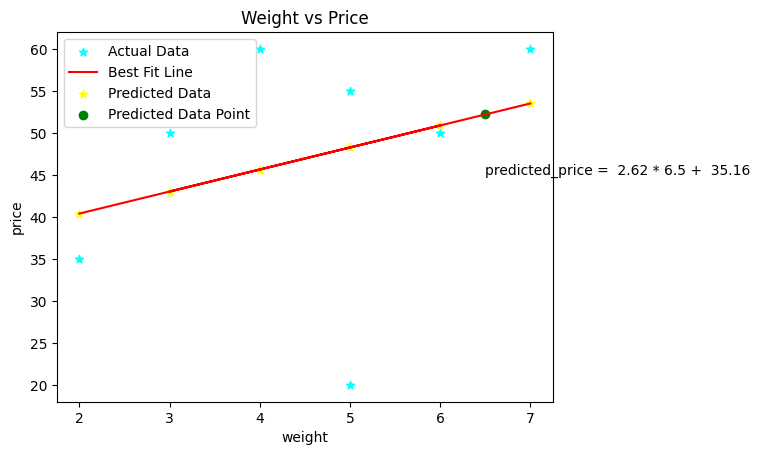

In [133]:
eqn = f"predicted_price = {float(lr.coef_): .2f} * {predict_weight} + {float(lr.intercept_): .2f}"
plt.text(6.5, min(df['price'])+25, eqn, fontsize=10,color='black')

plt.scatter(df['weight'], df['price'], color='cyan', marker='*', label = 'Actual Data')
plt.plot(df[['weight']], predicted_prices,  color='red', label = 'Best Fit Line')
plt.scatter(df[['weight']], predicted_prices, color = 'yellow', marker='*', label = 'Predicted Data')
plt.scatter(predict_weight, predict_price, color='green', marker='o', label = 'Predicted Data Point')
plt.xlabel('weight')
plt.ylabel('price')
plt.title('Weight vs Price')
plt.legend()
plt.show()

## Compute Residuals for each data point

In [134]:
df_2 = pd.DataFrame({'weight': weight, 'price': price, 'predicted_price': predicted_prices})
df_2

,weight,price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [135]:
df_2['Residuals'] = df_2['price'] - df_2['predicted_price']
df_2

,weight,price,predicted_price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


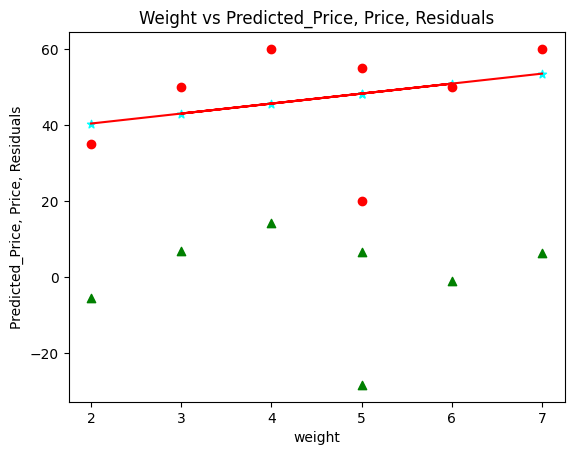

In [136]:
plt.scatter(df_2['weight'], df_2['predicted_price'], color='cyan', marker='*')
plt.scatter(df_2['weight'], df_2['price'], color='red', marker='o')
plt.scatter(df_2['weight'], df_2['Residuals'], color='green', marker='^')
plt.plot(df[['weight']], predicted_prices,  color='red', label = 'Best Fit Line')
plt.xlabel('weight')
plt.ylabel('Predicted_Price, Price, Residuals')
plt.title('Weight vs Predicted_Price, Price, Residuals')
plt.show()


## Calculating MSE and MAE Error


### 1. Mean Absolute Error (MSE) = MEAN( SUM ( ABSOLUTE (Price - Predicted_Price) ) ) = MEAN ( ABSOLUTE ( RESIDUALS ) )

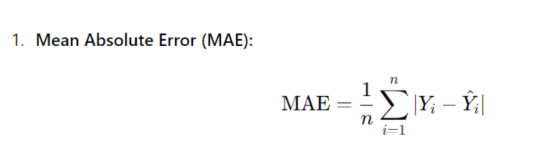

In [137]:
MAE = np.abs(df_2['Residuals']).mean()
print("Mean Absolute Error: ", MAE)

Mean Absolute Error:  9.87327188940092


### 2. Mean Squared Error (MSE) = MEAN( SUM ( RESIDUAL ^ 2 ) )
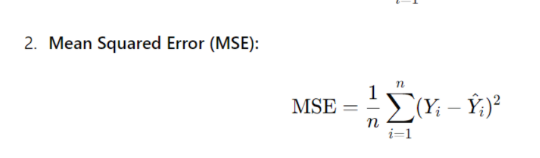

In [138]:
MSE = np.mean(df_2['Residuals'] ** 2)
print("Mean Squared Error: ", MSE)

Mean Squared Error:  167.30990783410135


### 3. Root Mean Squared Error (RMSE) = SQUARE_ROOT ( MSE )

In [139]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ", RMSE)

Root Mean Squared Error:  12.934833119685052


## Generating the Excel file

In [140]:
df_2['MAE'] = ''
middle_index = len(df_2) // 2
df_2.loc[middle_index, 'MAE'] = MAE
display(df_2)

,weight,price,predicted_price,Residuals,MAE
0,2,35,40.403226,-5.403226,
1,4,60,45.645161,14.354839,
2,5,20,48.266129,-28.266129,
3,3,50,43.024194,6.975806,9.873272
4,6,50,50.887097,-0.887097,
5,5,55,48.266129,6.733871,
6,7,60,53.508065,6.491935,


In [141]:
df_2['MSE'] = ''
df_2['RMSE'] = ''
df_2.loc[middle_index, 'MSE'] = MSE
df_2.loc[middle_index, 'RMSE'] = RMSE
display(df_2)

,weight,price,predicted_price,Residuals,MAE,MSE,RMSE
0,2,35,40.403226,-5.403226,,,
1,4,60,45.645161,14.354839,,,
2,5,20,48.266129,-28.266129,,,
3,3,50,43.024194,6.975806,9.873272,167.309908,12.934833
4,6,50,50.887097,-0.887097,,,
5,5,55,48.266129,6.733871,,,
6,7,60,53.508065,6.491935,,,


In [143]:
new_row = pd.DataFrame({'weight' : [predict_weight], 'price' : '', 'predicted_price' : [predict_price], 'Residuals' : '', 'MAE' : '', 'MSE' : '', 'RMSE' : ''})
df_2 = pd.concat([df_2, new_row], ignore_index=True)
df_2

,weight,price,predicted_price,Residuals,MAE,MSE,RMSE
0,2.0,35,40.403226,-5.403226,,,
1,4.0,60,45.645161,14.354839,,,
2,5.0,20,48.266129,-28.266129,,,
3,3.0,50,43.024194,6.975806,9.873272,167.309908,12.934833
4,6.0,50,50.887097,-0.887097,,,
5,5.0,55,48.266129,6.733871,,,
6,7.0,60,53.508065,6.491935,,,
7,6.5,,52.197581,,,,


In [144]:
df_2.to_csv('linear_regression_assignment_3.csv', index=False)